# Hyperboloidal Study of Tail Decay Rates for Scalar and Yang Mills Fields by Zenginoglu
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
## January 9, 2022

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [15]:
t,r,theta,phi,dt,dr,dtheta,dphi,m,Omega,K,C = symbols('t r theta phi dt dr dtheta dphi m Omega K C')

In [4]:
P = Function('P')(r)
P

In [24]:
Omega = Function('Omega')(r)
Omega

In [57]:
alpha = Function('alpha')(t,r)
alpha

In [58]:
beta = Function('beta')(t,r)
beta

In [59]:
gamma = Function('gamma')(t,r)
gamma

In [60]:
psi = Function('psi')(t,r)
psi

In [61]:
pi = Function('pi')(t,r)
pi

In [79]:
phi = Function('phi')(t,r)
phi

In [6]:
variables = Matrix( [t,r,theta,phi] )
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎣φ⎦

In [7]:
differentials = Matrix( [dt,dr,dtheta,dphi] ) 
differentials

⎡  dt  ⎤
⎢      ⎥
⎢  dr  ⎥
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎣ dphi ⎦

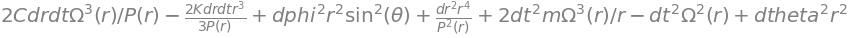

In [39]:
lineElement1 = expand(-(1-(2*m*Omega)/r)*Omega**2 * dt**2 - (2*((K*r**3/3)-C*Omega**3)/P)*dt*dr + (r**4/P**2)*dr**2 + r**2 * (dtheta**2 + sin(theta)**2 *dphi**2))
lineElement1

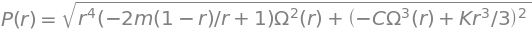

In [40]:
equation6b = Eq(P,((((K*r**3)/3)-C*Omega**3)**2 + ( 1 - ( (2*m)*(1-r))/r)*Omega**2 * r**4 )**Rational(1,2))
equation6b

In [26]:
#  Not numbered in text
equation6c = Eq(Omega,1-r)
equation6c

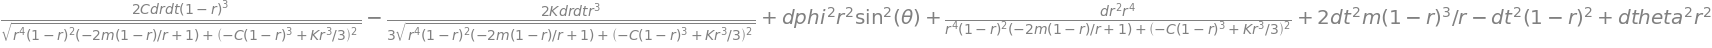

In [63]:
lineElement2 = lineElement1.subs(equation6b.lhs,equation6b.rhs).subs(equation6c.lhs,equation6c.rhs)
lineElement2

In [64]:
lineElement = expand( (-alpha**2 + gamma**2 * beta**2)*dt**2 + 2*gamma**2 * beta * dt * dr + gamma**2 * dr**2 + r**2 * (dtheta**2 + sin(theta)**2 * dphi**2) ) 
lineElement

In [ ]:
equation8a = Eq(alpha, (P/r**2))
equation8a

In [75]:
equation8b = Eq(beta, (((K*r**3)/3)-C*Omega**3)**2 )
equation8b

In [77]:
equation8c = Eq(gamma, 1/alpha)
equation8c

In [80]:
equation9a = Eq(psi,diff(phi,r))
equation9a

In [82]:
equation9b = Eq(pi, (gamma/alpha)*( diff(phi,t) - beta * diff(phi,r)) ) 
equation9b

In [96]:
auxiliaryVariables = solve( (equation9a,equation9b), diff(phi,r),diff(phi,t),dict=True)
auxiliaryVariables

In [103]:
auxiliaryVariables[0][diff(phi,r)]

In [102]:
auxiliaryVariables[0][diff(phi,t)]

In [65]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡   2          2        2                 2                      ⎤
⎢- α (t, r) + β (t, r)⋅γ (t, r)  β(t, r)⋅γ (t, r)  0       0     ⎥
⎢                                                                ⎥
⎢                2                    2                          ⎥
⎢       β(t, r)⋅γ (t, r)             γ (t, r)      0       0     ⎥
⎢                                                                ⎥
⎢                                                   2            ⎥
⎢              0                        0          r       0     ⎥
⎢                                                                ⎥
⎢                                                       2    2   ⎥
⎣              0                        0          0   r ⋅sin (θ)⎦

In [66]:
import sympy

In [67]:
m = sympy.Array(g)
m

⎡   2          2        2                 2                      ⎤
⎢- α (t, r) + β (t, r)⋅γ (t, r)  β(t, r)⋅γ (t, r)  0       0     ⎥
⎢                                                                ⎥
⎢                2                    2                          ⎥
⎢       β(t, r)⋅γ (t, r)             γ (t, r)      0       0     ⎥
⎢                                                                ⎥
⎢                                                   2            ⎥
⎢              0                        0          r       0     ⎥
⎢                                                                ⎥
⎢                                                       2    2   ⎥
⎣              0                        0          0   r ⋅sin (θ)⎦

In [68]:
from einsteinpy.symbolic import *

In [69]:
syms = sympy.symbols("t r theta phi")
t,r,theta,phi = syms

In [70]:
metric = MetricTensor(m,syms)

In [71]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡                ∂                     ∂              3               ∂              2     
⎢⎢α(t, r)⋅β(t, r)⋅──(α(t, r)) + α(t, r)⋅──(α(t, r)) - β (t, r)⋅γ(t, r)⋅──(γ(t, r)) - β (t, r
⎢⎢                ∂r                    ∂t                             ∂r                   
⎢⎢──────────────────────────────────────────────────────────────────────────────────────────
⎢⎢                                                                     2                    
⎢⎢                                                                    α (t, r)              
⎢⎢                                                                                          
⎢⎢                        ∂              2               ∂                      2       ∂   
⎢⎢                α(t, r)⋅──(α(t, r)) - β (t, r)⋅γ(t, r)⋅──(γ(t, r)) - β(t, r)⋅γ (t, r)⋅──(β
⎢⎢                        ∂r                             ∂r                             ∂r  
⎢⎢                ────────────────────────────────────────────────────

In [72]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛            2                         2      2          ⎞                       ⎛       
⎢  ⎜           ∂             ⎛∂          ⎞      ∂           ⎟  3        3           ⎜   2   
⎢r⋅⎜- β(t, r)⋅───(β(t, r)) - ⎜──(β(t, r))⎟  + ─────(β(t, r))⎟⋅α (t, r)⋅γ (t, r) + r⋅⎜- β (t,
⎢  ⎜            2            ⎝∂r         ⎠    ∂t ∂r         ⎟                       ⎜       
⎢  ⎝          ∂r                                            ⎠                       ⎝       
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

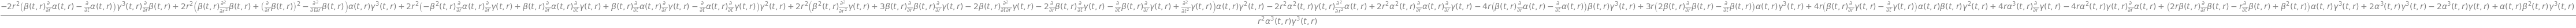

In [73]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [74]:
einst = EinsteinTensor.from_metric(metric)
simplify(einst.tensor())

⎡     2       ∂                  2       ∂                         ∂                        
⎢2.0⋅α (t, r)⋅──(γ(t, r))   2.0⋅β (t, r)⋅──(γ(t, r))   2.0⋅β(t, r)⋅──(β(t, r))   2.0⋅β(t, r)
⎢             ∂r                         ∂r                        ∂r                       
⎢──────────────────────── - ──────────────────────── + ─────────────────────── + ───────────
⎢          3                       r⋅γ(t, r)                      r                     r⋅γ(
⎢       r⋅γ (t, r)                                                                          
⎢                                                                                           
⎢                                                                         ∂                 
⎢                                                             2.0⋅β(t, r)⋅──(γ(t, r))   2.0⋅
⎢                                                                         ∂r                
⎢                                                           - ────────

In [ ]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [ ]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()